# Installing Library

In [4]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

In [6]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


# Import from Library

In [7]:
from IPython.display import HTML
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
from tensorflow.python.client import device_lib

# SPLIT DATA

In [9]:
#flow from directory helps divide dataset to training and validation dataset 
# and its important to note that you need to add data by installing splitfolder
#split folder will help split data into training, validation and test datasets.
# Specify the input directory and output directory

input_dir = r"C:\Users\PC\Downloads\VS\Pepper project" # Update this path
output_dir = "dataset"  # Your desired output directory

# Split the dataset
splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7, .1, .2))

Copying files: 2475 files [00:37, 65.72 files/s]


# rescale and rotation for transformation

In [11]:
#rescale and rotation for transformation
IMAGE_SIZE = 256
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 1731 images belonging to 2 classes.


# Generator help directly load images from directory

In [12]:
#Generator help directly load images from directory
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.64972866 0.6575718  0.74776787]
  [0.64581174 0.6536549  0.74385095]
  [0.6406521  0.64849526 0.7386914 ]
  ...
  [0.48365784 0.4758147  0.5620892 ]
  [0.48308852 0.4752454  0.56151986]
  [0.48251924 0.4746761  0.5609506 ]]

 [[0.64991844 0.6577616  0.74795765]
  [0.64600146 0.6538446  0.74404067]
  [0.6410316  0.64887476 0.73907083]
  ...
  [0.48492157 0.47707844 0.5633529 ]
  [0.48719877 0.47935563 0.56563014]
  [0.489476   0.48163286 0.56790733]]

 [[0.65010816 0.6579513  0.74814737]
  [0.6461912  0.6540343  0.74423045]
  [0.6414112  0.6492543  0.7394504 ]
  ...
  [0.52243173 0.5145886  0.6008631 ]
  [0.52262145 0.5147783  0.6010528 ]
  [0.52281123 0.5149681  0.60124266]]

 ...

 [[0.7306544  0.7228113  0.7737917 ]
  [0.7304646  0.72262144 0.7736019 ]
  [0.73027486 0.7224317  0.7734121 ]
  ...
  [0.5411765  0.5254902  0.5803922 ]
  [0.5350687  0.5193824  0.5742844 ]
  [0.51503736 0.4993511  0.55425304]]

 [[0.7294118  0.72156864 0.7725491 ]
  [0.7294118  0.72156864 0.7725491 ]


In [13]:

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 246 images belonging to 2 classes.


In [14]:
# therefore 3 generators were created
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 10
    )

#helps divide dataset to training and validation dataset and its important to note that you need to add data by installing splitfolder
test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 498 images belonging to 2 classes.


In [17]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    
])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,826 (1.06 MB)

 Trainable params: 277,826 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer= 'adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [20]:
1731/32

54.09375

In [21]:
246/32

7.6875

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=54,
    validation_data=validation_generator,
    validation_steps=7,
    epochs=20,
    verbose=1
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.6634 - loss: 0.6131 - val_accuracy: 0.8125 - val_loss: 0.3823
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7812 - loss: 0.4469 - val_accuracy: 0.8636 - val_loss: 0.3027
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8707 - loss: 0.3482 - val_accuracy: 0.9196 - val_loss: 0.1934
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9062 - loss: 0.3007 - val_accuracy: 1.0000 - val_loss: 0.0358
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9512 - loss: 0.1621 - val_accuracy: 0.9688 - val_loss: 0.0970
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9688 - loss: 0.0566 - val_accuracy: 1.0000 - val_loss: 0.0468
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9382 - loss: 0.2030 - val_accuracy: 0.9375 - val_loss: 0.1988
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9062 - loss: 0.3857 - val_accuracy: 0.9545 - val

In [23]:
scores = model.evaluate(test_generator)

16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9545 - loss: 0.0940


In [24]:
#Score is a list containing the Loss and Accuracy Value
scores

[0.10069771111011505, 0.9578313231468201]

# plotting the Accuracy and Loss Curves

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
history.history['accuracy']

[0.7386698126792908,
 0.78125,
 0.8905238509178162,
 0.90625,
 0.9546792507171631,
 0.96875,
 0.9470276832580566,
 0.90625,
 0.9770452976226807,
 0.96875,
 0.9870511889457703,
 0.96875,
 0.9911713004112244,
 1.0,
 0.9894055128097534,
 0.9375,
 0.9935256242752075,
 1.0,
 0.9764567613601685,
 0.96875]

In [29]:
type(history.history['loss'])

list

In [30]:
len(history.history['loss'])

20

In [31]:
history.history['loss']

[0.5124180316925049,
 0.4468907117843628,
 0.2976749539375305,
 0.30069994926452637,
 0.17796388268470764,
 0.05655878782272339,
 0.17034223675727844,
 0.38567501306533813,
 0.08607452362775803,
 0.027722595259547234,
 0.05001583322882652,
 0.05128215253353119,
 0.03475837782025337,
 0.012835707515478134,
 0.03440025821328163,
 0.20627689361572266,
 0.02792941965162754,
 0.0008951163617894053,
 0.06553471088409424,
 0.11052437871694565]

In [32]:
history.history['val_loss'] 

[0.3823380470275879,
 0.30267417430877686,
 0.19343848526477814,
 0.03581342473626137,
 0.09703292697668076,
 0.04683845862746239,
 0.19875390827655792,
 0.07038983702659607,
 0.04438858851790428,
 0.009913711808621883,
 0.008950495161116123,
 0.0027508926577866077,
 0.042715929448604584,
 0.08368225395679474,
 0.03729213401675224,
 0.010671989060938358,
 0.003931175917387009,
 0.0029461756348609924,
 0.04045002534985542,
 0.03231309354305267]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 

In [34]:
val_acc

[0.8125,
 0.8636363744735718,
 0.9196428656578064,
 1.0,
 0.96875,
 1.0,
 0.9375,
 0.9545454382896423,
 0.9821428656578064,
 1.0,
 1.0,
 1.0,
 0.9776785969734192,
 0.9545454382896423,
 0.9910714030265808,
 1.0,
 1.0,
 1.0,
 0.9866071343421936,
 1.0]

In [35]:
acc

[0.7386698126792908,
 0.78125,
 0.8905238509178162,
 0.90625,
 0.9546792507171631,
 0.96875,
 0.9470276832580566,
 0.90625,
 0.9770452976226807,
 0.96875,
 0.9870511889457703,
 0.96875,
 0.9911713004112244,
 1.0,
 0.9894055128097534,
 0.9375,
 0.9935256242752075,
 1.0,
 0.9764567613601685,
 0.96875]

history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs)


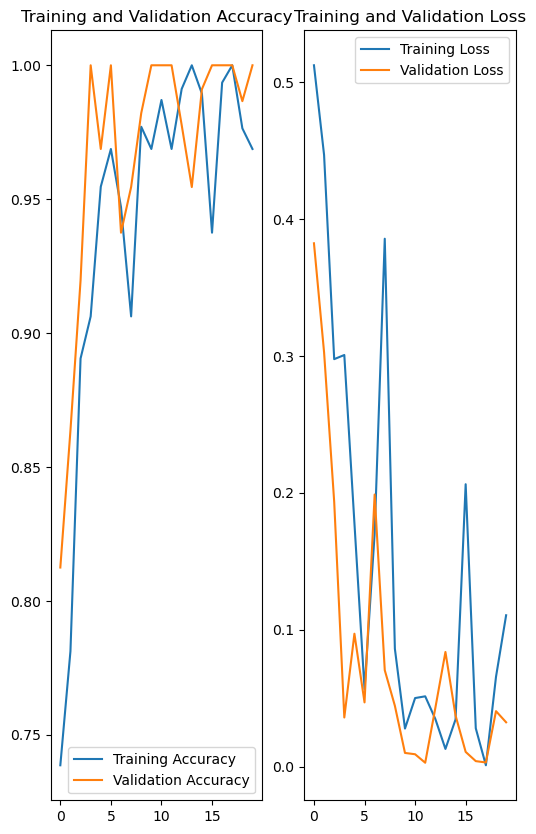

In [60]:
epochs = 20

plt.figure(figsize = (6, 10))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label = 'Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label = 'Training Loss')
plt.plot(range(epochs), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# RUN PREDICTION ON A SAMPLE IMAGE

In [37]:
#generate class names
class_names = list(train_generator.class_indices.keys())
print('Class names:', class_names)

Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


first image to predict
actual label: Pepper__bell___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Pepper__bell___Bacterial_spot


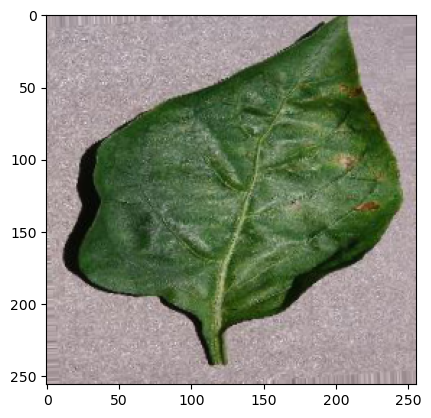

In [38]:
#making a prediction
import numpy as np

for images_batch, label_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break

In [39]:

print(device_lib.list_local_devices())  # Check if your GPU is detected

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11399820637180390048
xla_global_id: -1
]


In [40]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #create batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


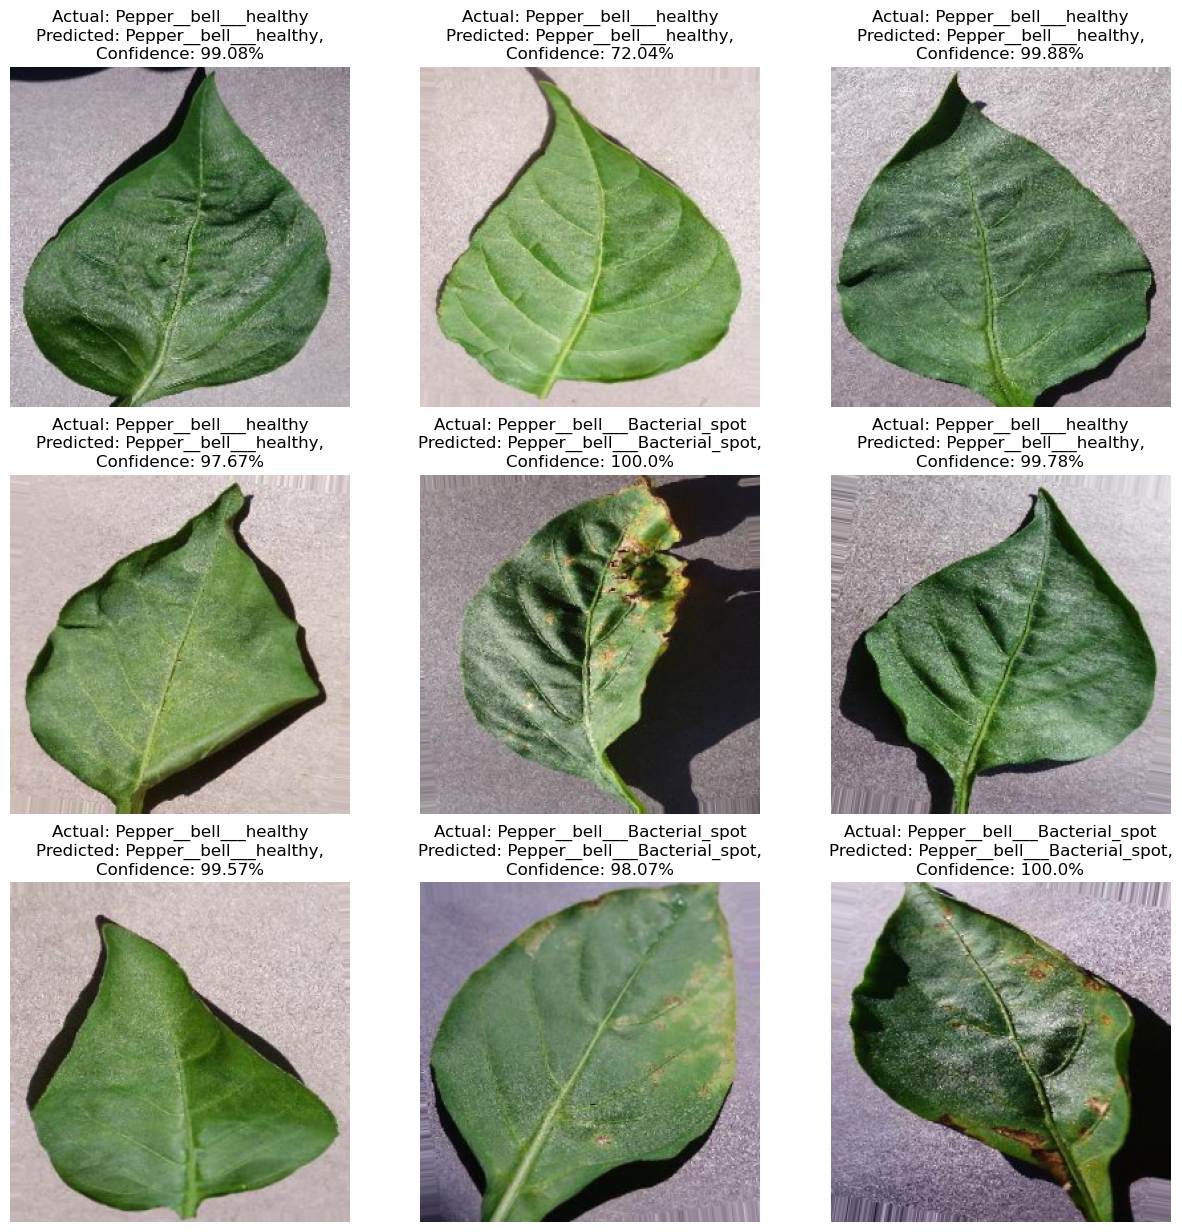

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class},\nConfidence: {confidence}%")
        
        plt.axis('off')
        
    break  


# SAVING THE MODEL 

In [47]:
import os

model_version = 1
save_dir = f'../Pepper project/models/'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(f'{save_dir}model_v{model_version}.keras')


In [45]:
model_version = 1
model.save(f'../Pepper project/models/model_v{model_version}.h5')
